In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [425]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных

try:
    df = pd.read_csv('HW1_var_4.csv', delimiter=';')
    print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
except:
    print("error loading file")
    exit()

# Первичный осмотр данных

print("Первые 5 строк данных:")
print(df.head())

# Дропаем id и номер варианта
df = df.drop(columns=["Номер варианта", "ID"])

# меняем BANCACCOUNT_FLAG 2 3 4 на 2
df.loc[df['BANKACCOUNT_FLAG'].isin([3, 4]), 'BANKACCOUNT_FLAG'] = 2

df.loc[df['EDUCATION'].isin(['*n.a.*']), 'EDUCATION'] = None

df.loc[df['EDUCATION'].isin(['Высшее/Второе высшее/Ученая степень']), 'EDUCATION'] = 'Высшее'


Размер данных: 10243 строк, 44 столбцов
Первые 5 строк данных:
   Номер варианта       ID              INCOME_BASE_TYPE CREDIT_PURPOSE  \
0               4  1000004  Поступление зарплаты на счет         Ремонт   
1               4  1000024  Поступление зарплаты на счет         Ремонт   
2               4  1000044  Поступление зарплаты на счет         Ремонт   
3               4  1000064                         2НДФЛ         Ремонт   
4               4  1000084                         2НДФЛ         Ремонт   

   INSURANCE_FLAG   DTI      SEX  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0             1.0  0.25  женский                      0                 0   
1             0.0  0.37  женский                      0                 0   
2             0.0  0.47  женский                      0                 0   
3             0.0   NaN  женский                      1                 0   
4             1.0  0.28  мужской                      2                 0   

   EDUCATION  ... own_c

/var/folders/l2/rysk733j62j2h1f0crfxb1j00000gn/T/ipykernel_1440/2575633348.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Высшее' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['EDUCATION'].isin(['Высшее/Второе высшее/Ученая степень']), 'EDUCATION'] = 'Высшее'


In [426]:
print("Информация о типах данных:")
print(df.dtypes)

Информация о типах данных:
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG           float64
DTI                      float64
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccountClosed         float64
sum_of_paym_mont

In [427]:
print("Основные статистические показатели:")
df.describe(include='all')


Основные статистические показатели:


,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,10177,10243,10241.000000,10114.000000,10243,10243.000000,10243.000000,10205.0,10235,10116,...,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
unique,4,10,NaN,NaN,2,NaN,NaN,7.0,9,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2НДФЛ,Ремонт,NaN,NaN,мужской,NaN,NaN,4.0,специалист,>250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3242,5681,NaN,NaN,5604,NaN,NaN,7296.0,3758,6371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.615272,0.387109,NaN,0.562238,0.004003,NaN,NaN,NaN,...,0.706124,14.034445,61.325041,0.566703,0.145708,0.084472,0.064790,0.028431,0.015582,0.011755
std,NaN,NaN,0.486555,0.137077,NaN,0.770545,0.077070,NaN,NaN,NaN,...,1.036797,15.503840,30.357025,0.495598,0.352862,0.278133,0.246188,0.166223,0.123870,0.107796
min,NaN,NaN,0.000000,0.020000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.280000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,1.000000,0.400000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,10.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,1.000000,0.490000,NaN,1.000000,0.000000,NaN,NaN,NaN,...,1.000000,18.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [428]:
missing_analysis = pd.DataFrame({
    'Тип данных': df.dtypes,
    'Уникальных значений': df.nunique(),
    'Пустых значений': df.isnull().sum(),
    'Доля пустых (%)': (df.isnull().sum() / len(df) * 100).round(2),
    'Нулевых значений': (df == 0).sum(),
    'Доля нулевых (%)': ((df == 0).sum() / len(df) * 100).round(2)
})

print("Анализ пропущенных и нулевых значений:")
print(missing_analysis)


Анализ пропущенных и нулевых значений:
                      Тип данных  Уникальных значений  Пустых значений  \
INCOME_BASE_TYPE          object                    4               66   
CREDIT_PURPOSE            object                   10                0   
INSURANCE_FLAG           float64                    2                2   
DTI                      float64                   59              129   
SEX                       object                    2                0   
FULL_AGE_CHILD_NUMBER      int64                    6                0   
DEPENDANT_NUMBER           int64                    3                0   
EDUCATION                 object                    7               38   
EMPL_TYPE                 object                    9                8   
EMPL_SIZE                 object                    6              127   
BANKACCOUNT_FLAG         float64                    3             2310   
Period_at_work           float64                  357             2313   

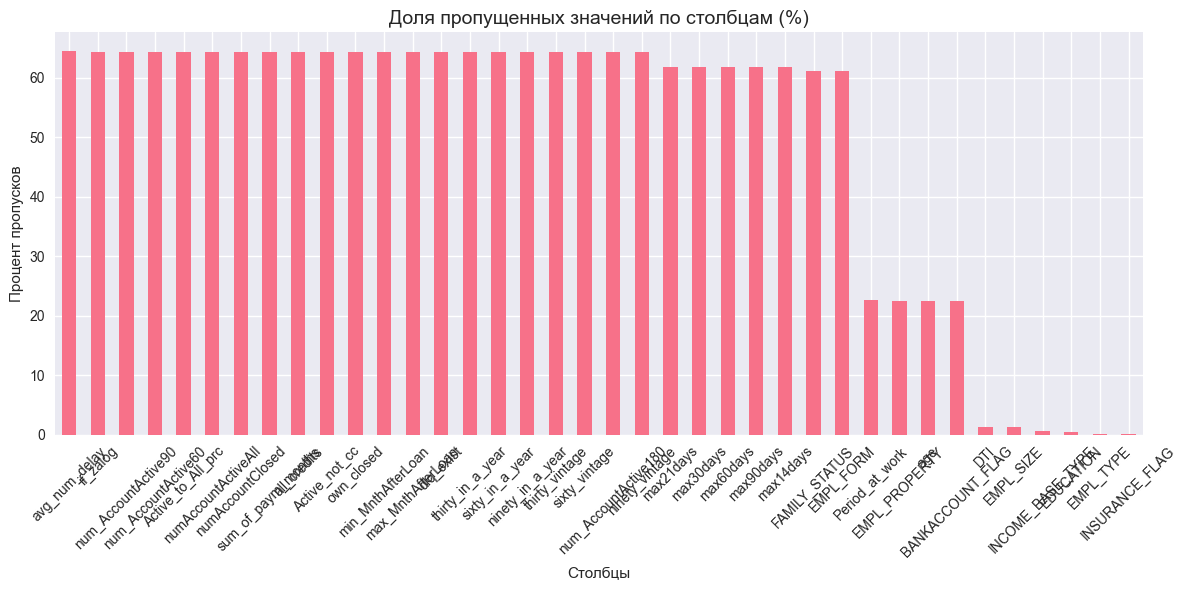

In [429]:
plt.figure(figsize=(12, 6))
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percent[missing_percent > 0].plot(kind='bar')
plt.title('Доля пропущенных значений по столбцам (%)', fontsize=14)
plt.xlabel('Столбцы')
plt.ylabel('Процент пропусков')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


In [430]:
# проверка отрицательных значений в числовых столбцах
numeric_cols = df.select_dtypes(include=[np.number]).columns
negative_check = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        negative_check[col] = (df[col] < 0).sum()

if negative_check:
    print("Отрицательные значения:")
    for col, count in negative_check.items():
        print(f"  {col}: {count} отрицательных значений")
else:
    print("отрицательных значений нет")
print()


Отрицательные значения:
  min_MnthAfterLoan: 9 отрицательных значений



In [431]:
text_cols = df.select_dtypes(include=['object']).columns
special_chars_check = {}
for col in text_cols:
    special_count = df[col].astype(str).str.contains(r'[^a-zA-Zа-яА-Я0-9\s/()<>=.,!?-]', na=False).sum()
    if special_count > 0:
        special_chars_check[col] = special_count
    print(df.loc[df[col].astype(str).str.contains(r'[^a-zA-Zа-яА-Я0-9\s/()<>=.,!?-]', na=False) == True])
if special_chars_check:
    print("Строки с некорректными символами:")
    for col, count in special_chars_check.items():
        print(f"  {col}: {count} строк с некорректными символами")
else:
    print("некорректных символов нет")


Empty DataFrame
Columns: [INCOME_BASE_TYPE, CREDIT_PURPOSE, INSURANCE_FLAG, DTI, SEX, FULL_AGE_CHILD_NUMBER, DEPENDANT_NUMBER, EDUCATION, EMPL_TYPE, EMPL_SIZE, BANKACCOUNT_FLAG, Period_at_work, age, EMPL_PROPERTY, EMPL_FORM, FAMILY_STATUS, max90days, max60days, max30days, max21days, max14days, avg_num_delay, if_zalog, num_AccountActive180, num_AccountActive90, num_AccountActive60, Active_to_All_prc, numAccountActiveAll, numAccountClosed, sum_of_paym_months, all_credits, Active_not_cc, own_closed, min_MnthAfterLoan, max_MnthAfterLoan, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage]
Index: []

[0 rows x 42 columns]
Empty DataFrame
Columns: [INCOME_BASE_TYPE, CREDIT_PURPOSE, INSURANCE_FLAG, DTI, SEX, FULL_AGE_CHILD_NUMBER, DEPENDANT_NUMBER, EDUCATION, EMPL_TYPE, EMPL_SIZE, BANKACCOUNT_FLAG, Period_at_work, age, EMPL_PROPERTY, EMPL_FORM, FAMILY_STATUS, max90days, max60days, max30days, max21days, max14days, avg_num_delay, if_zal

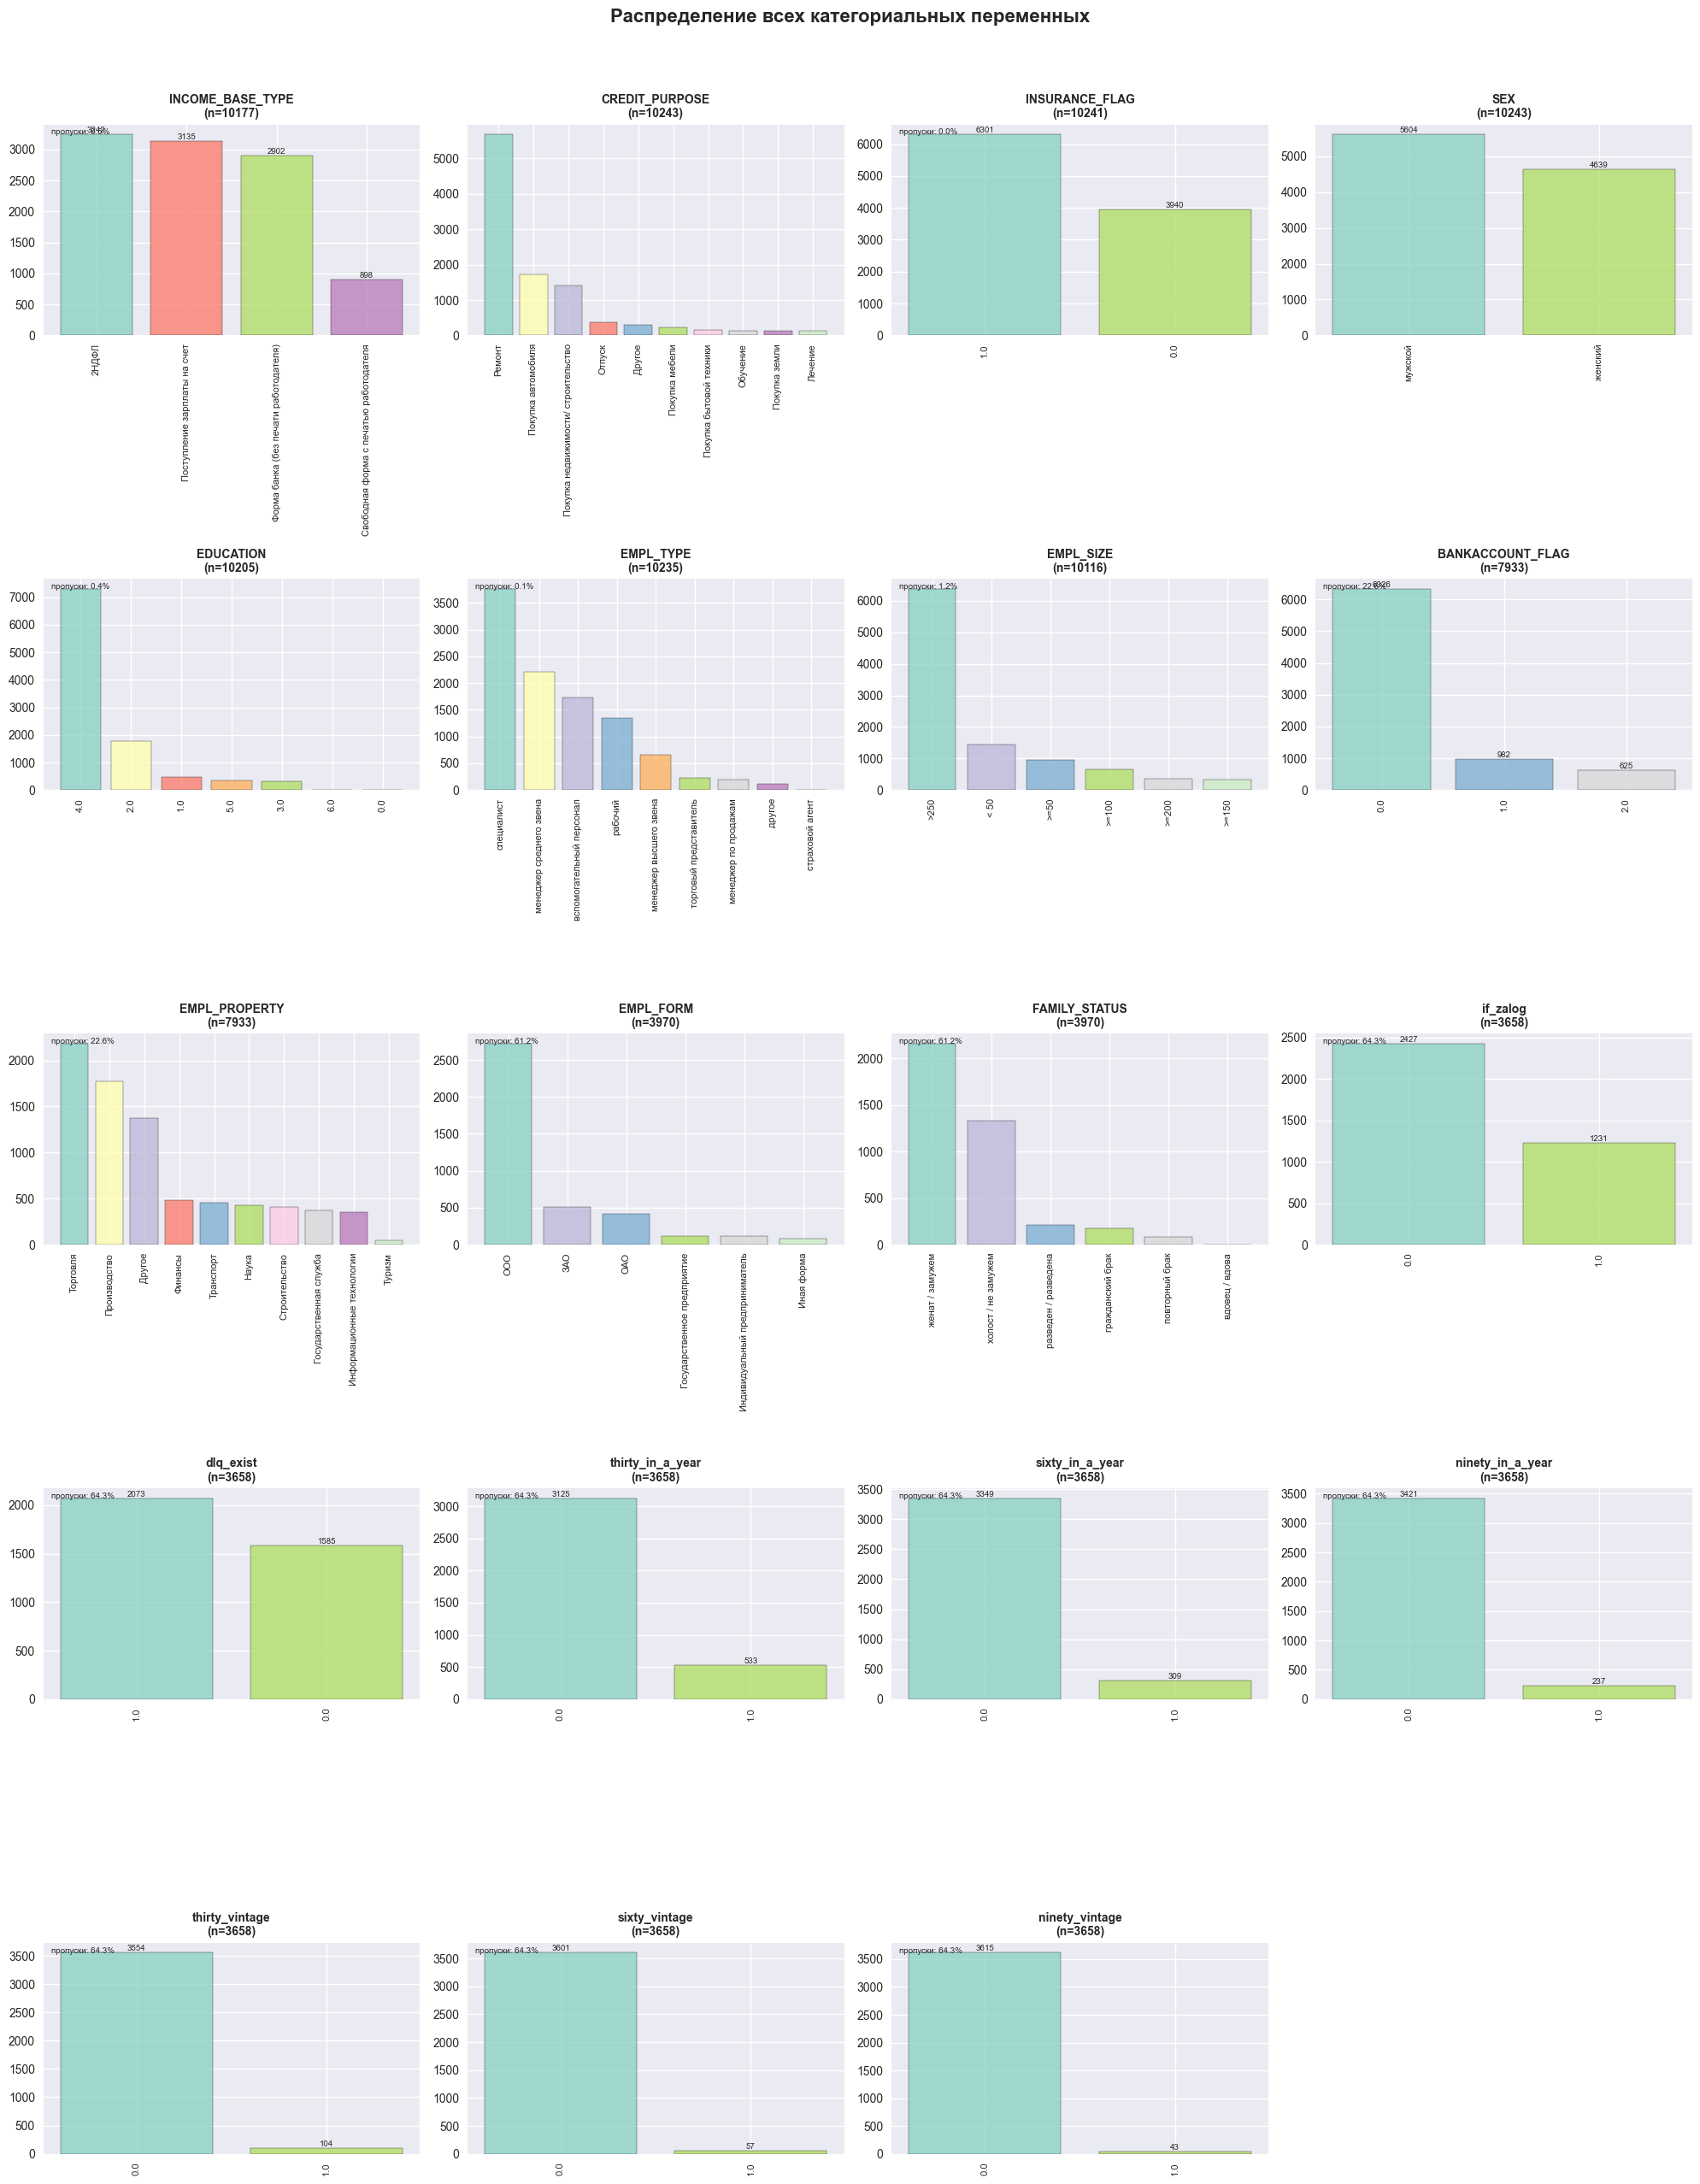

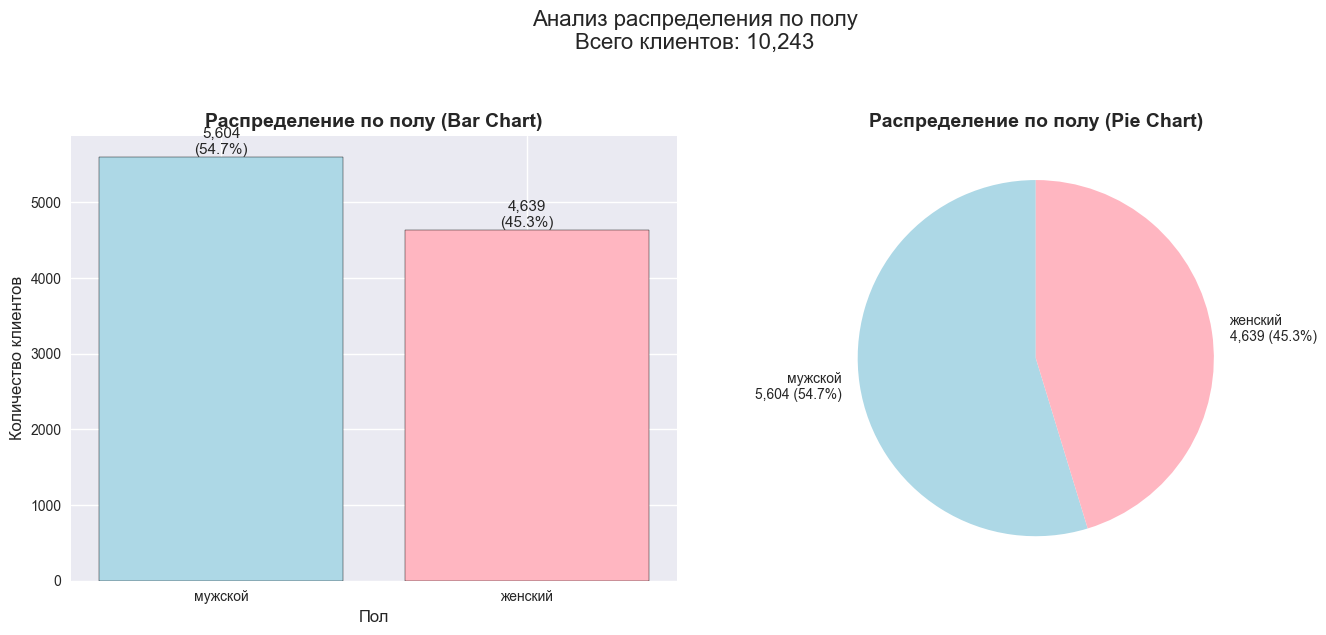

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Список категориальных переменных
categorical_vars = [
    'INCOME_BASE_TYPE',
    'CREDIT_PURPOSE', 
    'INSURANCE_FLAG',
    'SEX',
    'EDUCATION',
    'EMPL_TYPE',
    'EMPL_SIZE',
    'BANKACCOUNT_FLAG',
    'EMPL_PROPERTY',
    'EMPL_FORM',
    'FAMILY_STATUS',
    'if_zalog',
    'dlq_exist',
    'thirty_in_a_year',
    'sixty_in_a_year',
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage'
]

# функция простроения bar chart
def plot_simple_bar(var_name, data, max_categories=20):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    value_counts = data[var_name].value_counts(dropna=True)
    
    if len(value_counts) > max_categories:
        value_counts = value_counts.head(max_categories)
    
    bars = ax.bar(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    
    ax.set_title(f'Распределение: {var_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Значения', fontsize=12)
    ax.set_ylabel('Количество', fontsize=12)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=10)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9)
    
    # сетка на графике
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig

# график для каждой категориальной переменной
for i, var in enumerate(categorical_vars, 1):    
    if var not in df.columns:
        print(f"cтолбец {var} не найден")
        continue
    
    if df[var].notna().sum() == 0:
        print(f"значений для {var} нет")
        continue
    
    # создаем график
    fig = plot_simple_bar(var, df)
    
    # сохраняем график в файл
    filename = f"task1/bar_chart_{var}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)
    
# общий график

n_vars = len(categorical_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() 

for idx, var in enumerate(categorical_vars):
    if idx >= len(axes):
        break
    
    ax = axes[idx]
    
    if var not in df.columns:
        ax.text(0.5, 0.5, f"{var}\nне найден", 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(var, fontsize=10)
        continue
    
    value_counts = df[var].value_counts(dropna=True).head(10)
    
    if len(value_counts) == 0:
        ax.text(0.5, 0.5, "Нет данных", 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(var, fontsize=10)
        continue
    
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=plt.cm.Set3(np.arange(len(value_counts))/len(value_counts)),
                  edgecolor='black', alpha=0.8)
    
    ax.set_title(f'{var}\n(n={df[var].notna().sum()})', fontsize=10, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=90, fontsize=8)
    
    if len(value_counts) <= 5:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=7)
    
    missing_pct = df[var].isnull().mean() * 100
    if missing_pct > 0:
        ax.text(0.02, 0.98, f'пропуски: {missing_pct:.1f}%',
                transform=ax.transAxes, fontsize=7,
                verticalalignment='top')

for idx in range(len(categorical_vars), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Распределение всех категориальных переменных', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

fig.savefig('task1/all_categorical_variables.png', dpi=300, bbox_inches='tight')
plt.show()


if 'SEX' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # bar chart для пола
    sex_counts = df['SEX'].value_counts(dropna=True)
    bars1 = ax1.bar(sex_counts.index.astype(str), sex_counts.values, 
                   color=['lightblue', 'lightpink', 'lightgray'], 
                   edgecolor='black')
    
    ax1.set_title('Распределение по полу (Bar Chart)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Пол', fontsize=12)
    ax1.set_ylabel('Количество клиентов', fontsize=12)
    
    # Добавляем значения
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11)
    
    # 2. Pie chart
    sex_counts_no_missing = df['SEX'].value_counts(dropna=True)
    ax2.pie(sex_counts_no_missing.values, 
            labels=[f'{label}\n{count:,} ({count/sex_counts_no_missing.sum()*100:.1f}%)' 
                   for label, count in zip(sex_counts_no_missing.index, sex_counts_no_missing.values)],
            autopct='',  # Уже добавили в labels
            colors=['lightblue', 'lightpink', 'lightgray'],
            startangle=90)
    ax2.set_title('Распределение по полу (Pie Chart)', fontsize=14, fontweight='bold')
    
    # информация о пропусках
    missing_info = ""
    if df['SEX'].isnull().sum() > 0:
        missing_info = f"\nПропущено: {df['SEX'].isnull().sum()} ({df['SEX'].isnull().mean()*100:.1f}%)"
    
    plt.suptitle(f'Анализ распределения по полу\nВсего клиентов: {len(df):,}{missing_info}', 
                 fontsize=16, y=1.05)
    plt.tight_layout()
    plt.savefig('sex_distribution_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()


In [433]:
# вывдем в строки в которых null являются thirty_in_a_year, sixty_in_a_year, 
# ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage, то
# есть те строки в которых пропущенных одинаково

target_cols = [
    'thirty_in_a_year',
    'sixty_in_a_year', 
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage'
]

rows_null_all = df[df[target_cols].isnull().all(axis=1)]

print(f"Строк, где все столбцы пусты: {len(rows_null_all)}")


Строк, где все столбцы пусты: 6585


In [434]:
new_df = df[df[target_cols].notnull().all(axis=1)]

In [435]:
missing_analysis = pd.DataFrame({
    'Тип данных': new_df.dtypes,
    'Уникальных значений': new_df.nunique(),
    'Пустых значений': new_df.isnull().sum(),
    'Доля пустых (%)': (new_df.isnull().sum() / len(new_df) * 100).round(2),
    'Нулевых значений': (new_df == 0).sum(),
    'Доля нулевых (%)': ((new_df == 0).sum() / len(new_df) * 100).round(2)
})

print("Анализ пропущенных и нулевых значений:")
print(missing_analysis)


Анализ пропущенных и нулевых значений:
                      Тип данных  Уникальных значений  Пустых значений  \
INCOME_BASE_TYPE          object                    4                0   
CREDIT_PURPOSE            object                   10                0   
INSURANCE_FLAG           float64                    2                1   
DTI                      float64                   59                0   
SEX                       object                    2                0   
FULL_AGE_CHILD_NUMBER      int64                    6                0   
DEPENDANT_NUMBER           int64                    3                0   
EDUCATION                 object                    7               16   
EMPL_TYPE                 object                    8                0   
EMPL_SIZE                 object                    2                0   
BANKACCOUNT_FLAG         float64                    3                0   
Period_at_work           float64                  257                1   

In [436]:
df_2 = new_df[new_df[["INSURANCE_FLAG", "EDUCATION"]].notnull().all(axis=1)]

In [437]:
sum(df_2.isnull().sum())

32

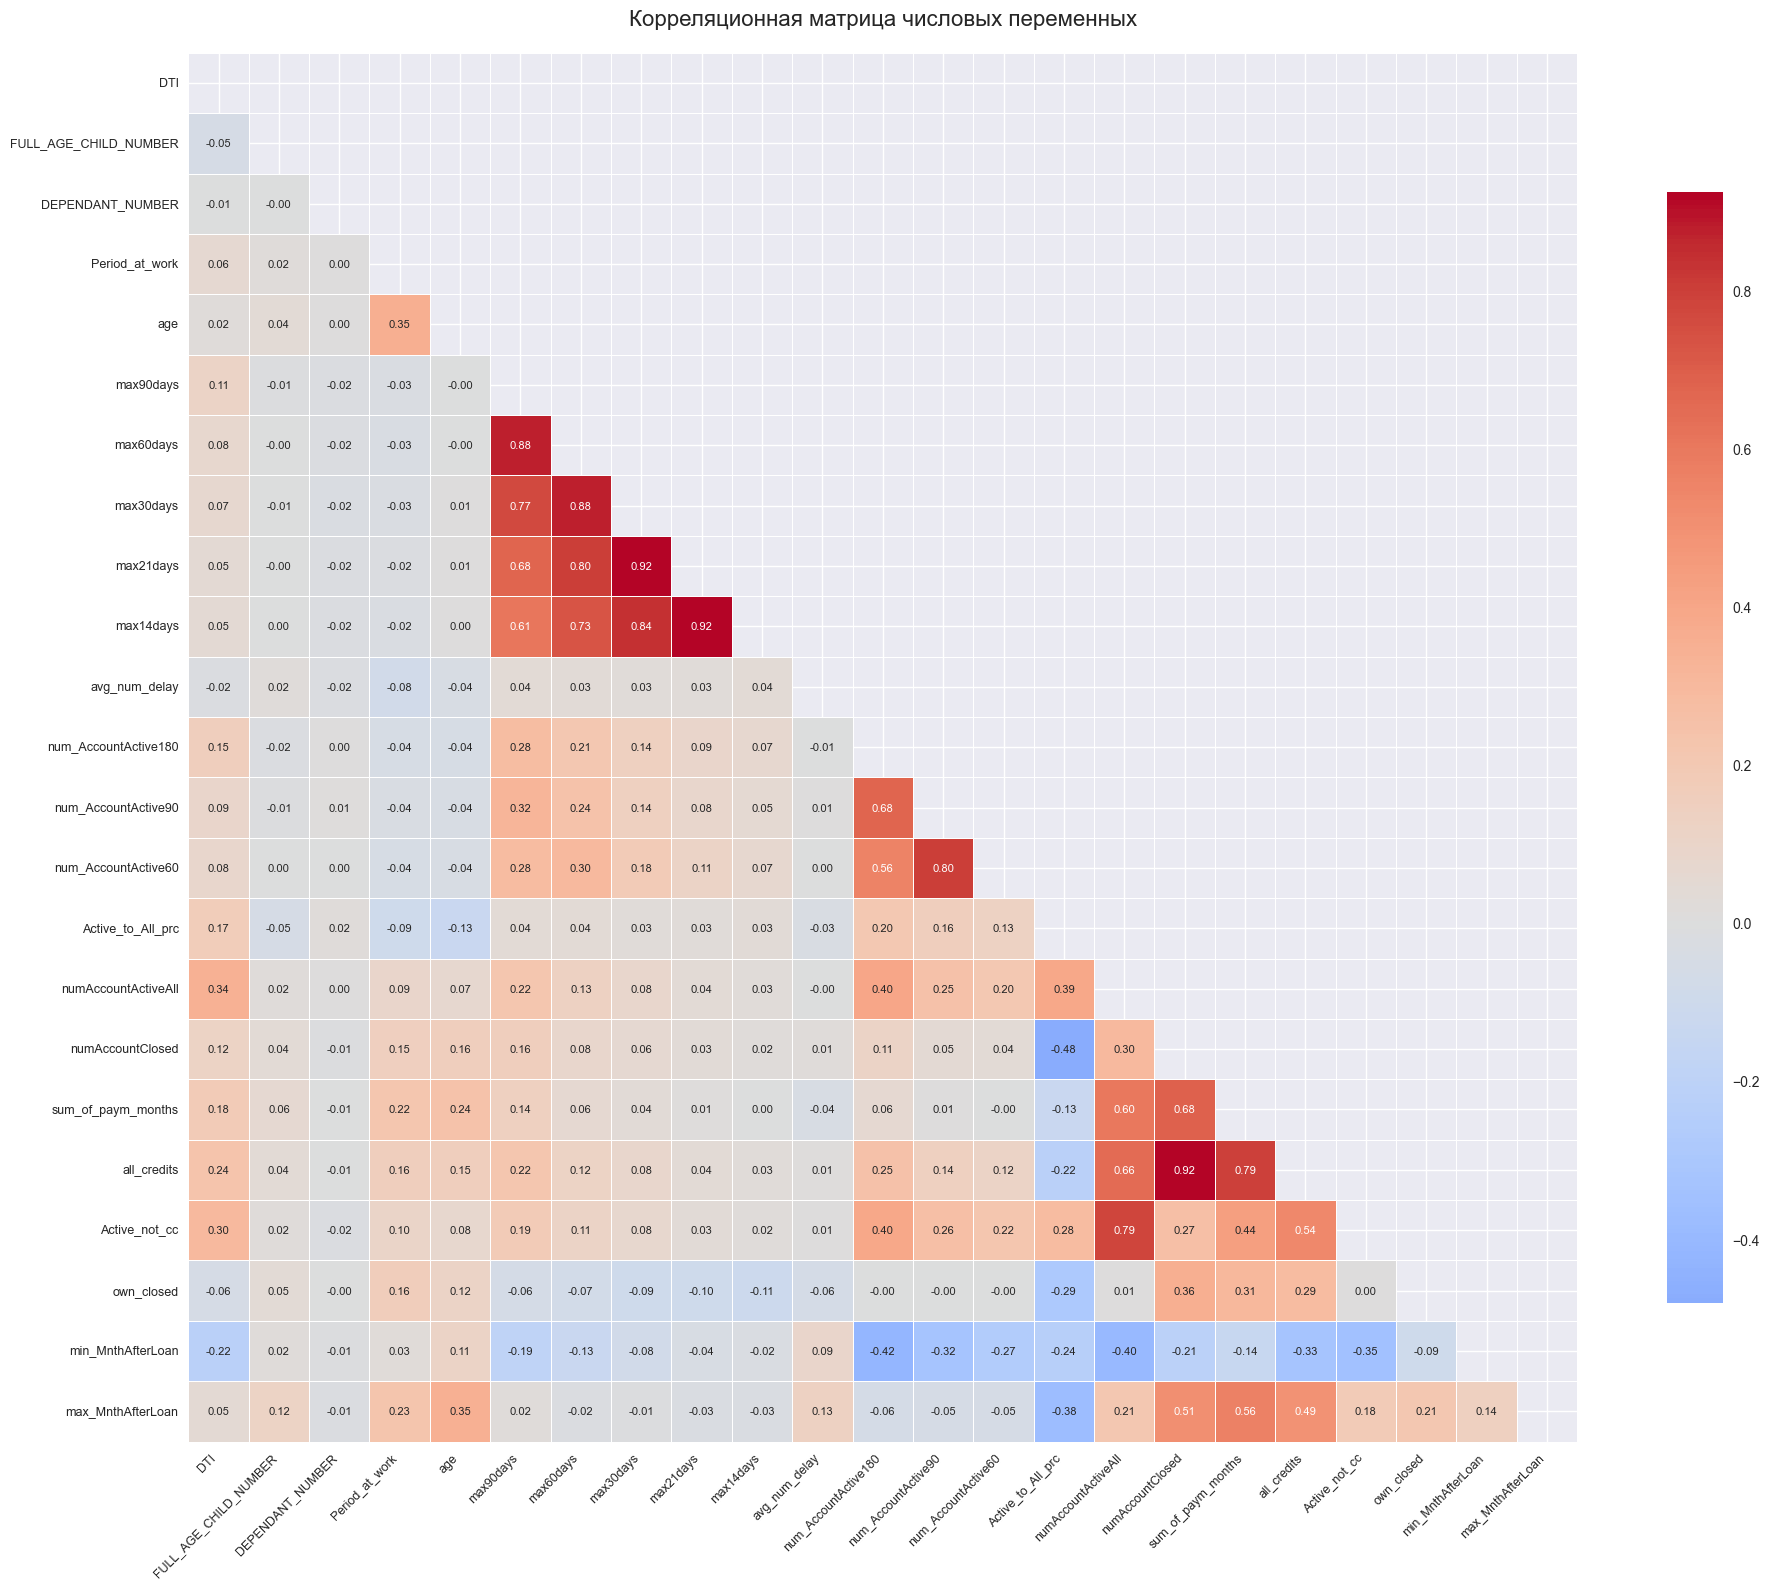


поиск больших корреляций (|r| > 0.65):
max21days ↔ max14days: 0.925
numAccountClosed ↔ all_credits: 0.918
max30days ↔ max21days: 0.916
max60days ↔ max30days: 0.879
max90days ↔ max60days: 0.877
max30days ↔ max14days: 0.840
num_AccountActive90 ↔ num_AccountActive60: 0.804
max60days ↔ max21days: 0.802
sum_of_paym_months ↔ all_credits: 0.793
numAccountActiveAll ↔ Active_not_cc: 0.788
max90days ↔ max30days: 0.770
max60days ↔ max14days: 0.729
numAccountClosed ↔ sum_of_paym_months: 0.684
num_AccountActive180 ↔ num_AccountActive90: 0.678
max90days ↔ max21days: 0.676
numAccountActiveAll ↔ all_credits: 0.656


In [438]:
num_variables = [
    'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work',
    'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
    'avg_num_delay', 'num_AccountActive180', 'num_AccountActive90',
    'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll',
    'numAccountClosed', 'sum_of_paym_months', 'all_credits',
    'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan'
]


df_clean = df_2.copy()
df_num_clean = df_2[num_variables].copy()
for col in df_clean.columns:
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

corr_matrix = df_num_clean.corr(method='pearson')


plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm',
            center=0,   
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})


plt.title('Корреляционная матрица числовых переменных', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nпоиск больших корреляций (|r| > 0.65):")
strong_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.65:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            strong_corr.append((var1, var2, corr_val))

if strong_corr:
    for var1, var2, corr_val in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} ↔ {var2}: {corr_val:.3f}")


In [439]:
missing_analysis = pd.DataFrame({
    'Тип данных': df_clean.dtypes,
    'Уникальных значений': df_clean.nunique(),
    'Пустых значений': df_clean.isnull().sum(),
    'Доля пустых (%)': (df_clean.isnull().sum() / len(df_clean) * 100).round(2),
    'Нулевых значений': (df_clean == 0).sum(),
    'Доля нулевых (%)': ((df_clean == 0).sum() / len(df_clean) * 100).round(2)
})

print("Анализ пропущенных и нулевых значений:")
print(missing_analysis)


Анализ пропущенных и нулевых значений:
                      Тип данных  Уникальных значений  Пустых значений  \
INCOME_BASE_TYPE          object                    4                0   
CREDIT_PURPOSE            object                   10                0   
INSURANCE_FLAG           float64                    2                0   
DTI                      float64                   59                0   
SEX                       object                    2                0   
FULL_AGE_CHILD_NUMBER      int64                    6                0   
DEPENDANT_NUMBER           int64                    3                0   
EDUCATION                 object                    7                0   
EMPL_TYPE                 object                    8                0   
EMPL_SIZE                 object                    2                0   
BANKACCOUNT_FLAG         float64                    3                0   
Period_at_work           float64                  257                0   

In [440]:
sum(df_clean.isnull().sum())

0

In [441]:
df_clean

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,Поступление зарплаты на счет,Ремонт,1.0,0.25,женский,0,0,3.0,рабочий,>250,...,0.0,3.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Поступление зарплаты на счет,Ремонт,0.0,0.47,женский,0,0,4.0,специалист,>250,...,0.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.56,женский,0,0,1.0,специалист,>250,...,0.0,22.0,79.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6,Форма банка (без печати работодателя),Ремонт,0.0,0.56,мужской,0,0,4.0,менеджер среднего звена,< 50,...,0.0,9.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Поступление зарплаты на счет,Ремонт,1.0,0.26,мужской,0,0,1.0,менеджер среднего звена,>250,...,3.0,21.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,Форма банка (без печати работодателя),Ремонт,1.0,0.15,мужской,0,0,4.0,рабочий,< 50,...,1.0,23.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,2НДФЛ,Ремонт,1.0,0.46,женский,1,0,4.0,специалист,>250,...,0.0,13.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10235,2НДФЛ,Ремонт,1.0,0.59,женский,0,0,4.0,специалист,>250,...,0.0,1.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,2НДФЛ,Ремонт,1.0,0.23,мужской,3,0,4.0,менеджер среднего звена,>250,...,4.0,9.0,84.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [442]:
from sklearn.preprocessing import LabelEncoder

cat_vars = [
    'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX',
    'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM',
    'FAMILY_STATUS'
]

mapping_dict = {}
for var in cat_vars:
    original_values = df_clean[var].copy()
    
    dummies = pd.get_dummies(df_clean[var], prefix=var, dtype=int)
        
    df_clean = pd.concat([df_clean, dummies], axis=1)


    print(f"{var}: {df_clean[var].nunique()} значений закодировано")

df_clean = df_clean.drop(columns=cat_vars)



INCOME_BASE_TYPE: 4 значений закодировано
CREDIT_PURPOSE: 10 значений закодировано
SEX: 2 значений закодировано
EMPL_TYPE: 8 значений закодировано
EMPL_SIZE: 2 значений закодировано
EMPL_PROPERTY: 5 значений закодировано
EMPL_FORM: 6 значений закодировано
FAMILY_STATUS: 6 значений закодировано


In [443]:
df_clean

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,1.0,0.25,0,0,3.0,0.0,70.0,50.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,0.0,0.47,0,0,4.0,0.0,10.0,25.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
5,1.0,0.56,0,0,1.0,0.0,76.0,27.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,1
6,0.0,0.56,0,0,4.0,0.0,64.0,31.0,5.0,1.0,...,0,0,0,1,0,0,1,0,0,0
9,1.0,0.26,0,0,1.0,0.0,82.0,33.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,1.0,0.15,0,0,4.0,0.0,113.0,47.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
10232,1.0,0.46,1,0,4.0,0.0,244.0,41.0,5.0,2.0,...,0,0,0,0,0,0,1,0,0,0
10235,1.0,0.59,0,0,4.0,0.0,83.0,43.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
10236,1.0,0.23,3,0,4.0,0.0,101.0,40.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [444]:
# Нормализуем данные 

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_norm_numeric = (df_clean[numeric_cols] - df_clean[numeric_cols].min()) / (df_clean[numeric_cols].max() - df_clean[numeric_cols].min())
df_norm = pd.concat([df_norm_numeric, df_clean.select_dtypes(exclude=[np.number])], axis=1)

In [445]:
df_norm.dtypes

INSURANCE_FLAG                        float64
DTI                                   float64
FULL_AGE_CHILD_NUMBER                 float64
DEPENDANT_NUMBER                      float64
BANKACCOUNT_FLAG                      float64
                                       ...   
FAMILY_STATUS_женат / замужем         float64
FAMILY_STATUS_повторный брак          float64
FAMILY_STATUS_разведен / разведена    float64
FAMILY_STATUS_холост / не замужем     float64
EDUCATION                              object
Length: 77, dtype: object

/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

  n=2: BIC=-795483, AIC=-833681, Silhouette=0.053, Calinski-Harabasz=70


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

  n=3: BIC=-778090, AIC=-835391, Silhouette=0.054, Calinski-Harabasz=147


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

  n=4: BIC=-856022, AIC=-932425, Silhouette=0.067, Calinski-Harabasz=158


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python

  n=5: BIC=-874214, AIC=-969719, Silhouette=0.052, Calinski-Harabasz=148


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python

  n=6: BIC=-834582, AIC=-949189, Silhouette=0.049, Calinski-Harabasz=124


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python

  n=7: BIC=-837096, AIC=-970805, Silhouette=0.037, Calinski-Harabasz=107


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python

  n=8: BIC=-853895, AIC=-1006707, Silhouette=0.046, Calinski-Harabasz=115


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python

  n=9: BIC=-828675, AIC=-1000589, Silhouette=0.048, Calinski-Harabasz=113


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


  n=10: BIC=-807753, AIC=-998769, Silhouette=0.046, Calinski-Harabasz=107


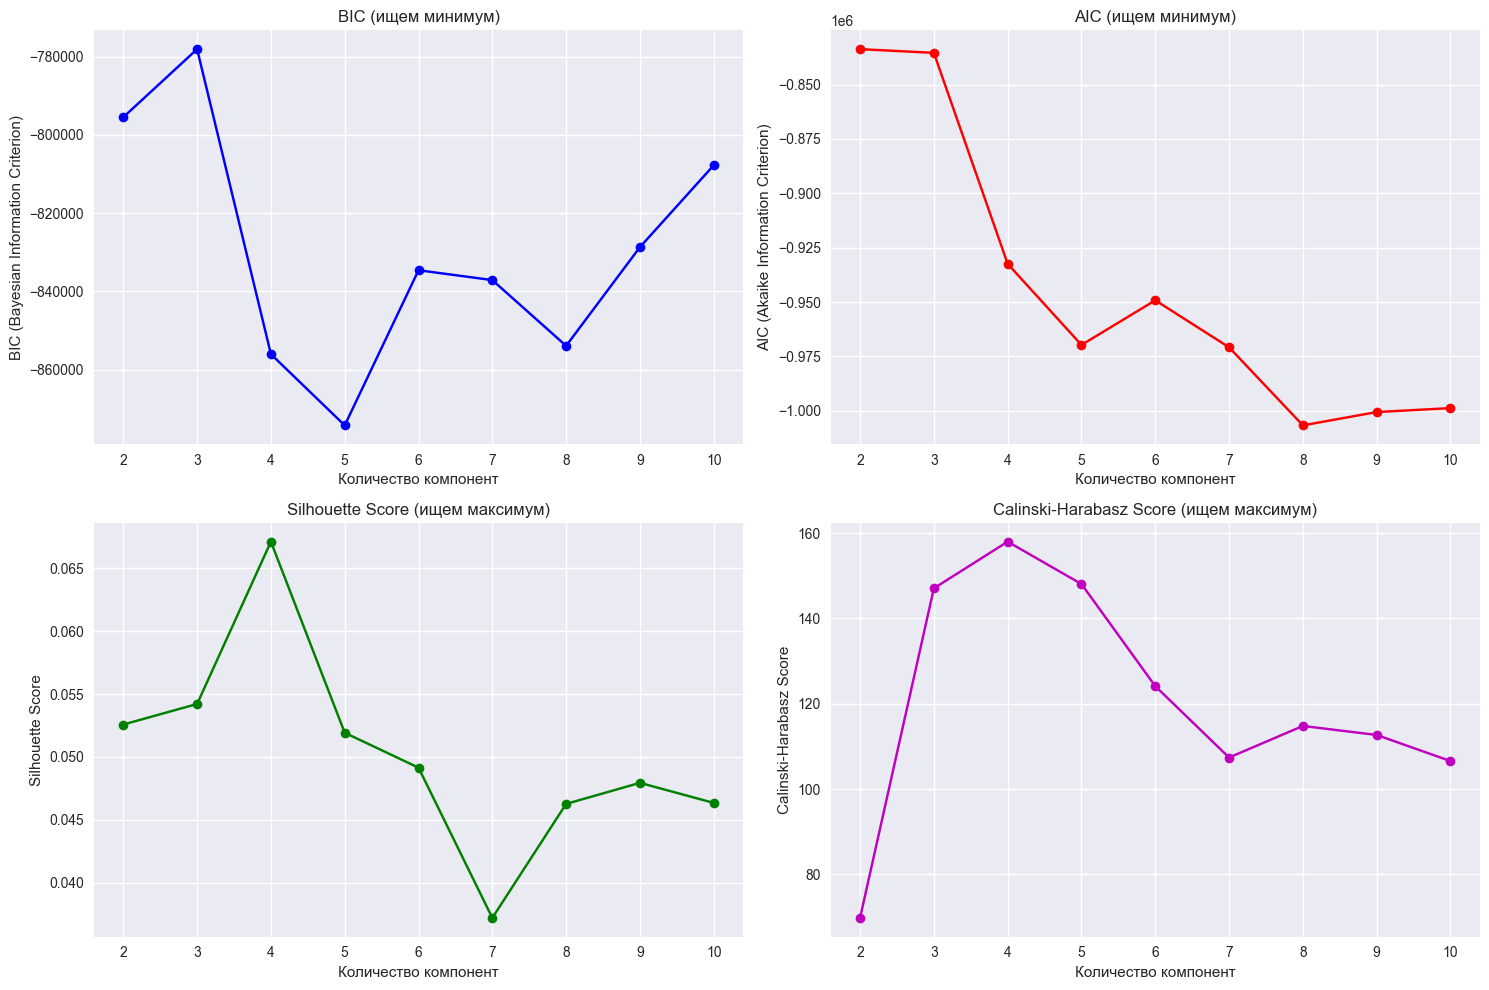


Оптимальное количество компонент: 5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

n_components_range = range(2, 11)
bic_scores = []
aic_scores = []
silhouette_scores = []
calinski_harabasz_scores = []


models = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=265, covariance_type='full')
    gmm.fit(df_norm)
    labels = gmm.predict(df_norm)
    
    bic_scores.append(gmm.bic(df_norm))
    aic_scores.append(gmm.aic(df_norm))
    
    silhouette_scores.append(silhouette_score(df_norm, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_norm, labels))
    
    models.append(gmm)
    
    print(f"  n={n}: BIC={bic_scores[-1]:.0f}, AIC={aic_scores[-1]:.0f}, "
          f"Silhouette={silhouette_scores[-1]:.3f}, Calinski-Harabasz={calinski_harabasz_scores[-1]:.0f}")

plt.figure(figsize=(15, 10))

# 1. BIC
plt.subplot(2, 2, 1)
plt.plot(n_components_range, bic_scores, 'bo-')
plt.xlabel('Количество компонент')
plt.ylabel('BIC (Bayesian Information Criterion)')
plt.title('BIC (ищем минимум)')
plt.grid(True)

# 2. AIC
plt.subplot(2, 2, 2)
plt.plot(n_components_range, aic_scores, 'ro-')
plt.xlabel('Количество компонент')
plt.ylabel('AIC (Akaike Information Criterion)')
plt.title('AIC (ищем минимум)')
plt.grid(True)

# 3. Silhouette Score
plt.subplot(2, 2, 3)
plt.plot(n_components_range, silhouette_scores, 'go-')
plt.xlabel('Количество компонент')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (ищем максимум)')
plt.grid(True)

# 4. Calinski-Harabasz Score
plt.subplot(2, 2, 4)
plt.plot(n_components_range, calinski_harabasz_scores, 'mo-')
plt.xlabel('Количество компонент')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score (ищем максимум)')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_n = n_components_range[np.argmin(bic_scores)] 
print(f"\nОптимальное количество компонент: {optimal_n}")


In [478]:
gmm = GaussianMixture(n_components=optimal_n, 
                      random_state=265, 
                      covariance_type='full',
                      n_init=15,
                      max_iter=1000)

# Получаем вероятности принадлежности и метки кластеров
gmm.fit(df_norm)
labels = gmm.predict(df_norm)
probs = gmm.predict_proba(df_norm)


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

In [479]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"\nРазмеры кластеров:")
for label, count in zip(unique_labels, counts):
    print(f"  Кластер {label}: {count} точек ({count/len(df_norm)*100:.1f}%)")



Размеры кластеров:
  Кластер 0: 1248 точек (34.3%)
  Кластер 1: 783 точек (21.5%)
  Кластер 2: 1167 точек (32.1%)
  Кластер 3: 195 точек (5.4%)
  Кластер 4: 248 точек (6.8%)


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value enc

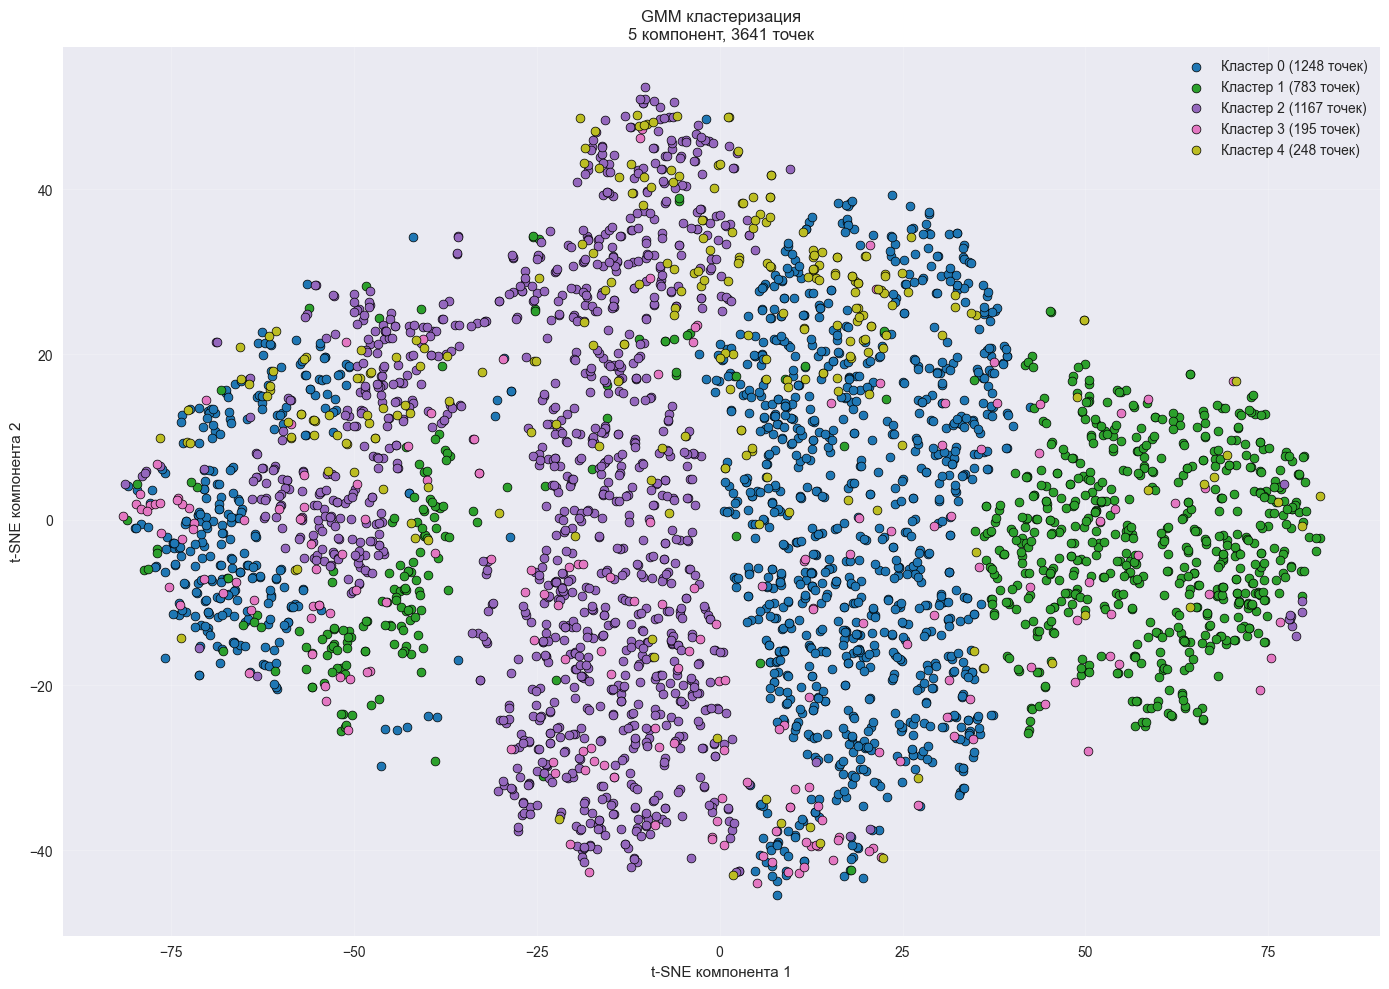

In [481]:
X_sample = df_norm.values
labels_sample = labels
probs_sample = probs

# t-SNE
tsne = TSNE(n_components=2, random_state=257, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(14, 10))

for cluster_id in range(optimal_n):
    mask = (labels_sample == cluster_id)
    
    if mask.any():
        scatter = plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                             c=[plt.cm.tab20(cluster_id / optimal_n)],
                             s=40,
                             edgecolor='k',
                             linewidth=0.5,
                             label=f'Кластер {cluster_id} ({np.sum(mask)} точек)')
plt.title(f'GMM кластеризация\n{optimal_n} компонент, {len(df_norm)} точек')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('gmm_tsne.png', dpi=300)
plt.show()



In [482]:
num_variables = [
    'DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work',
    'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
    'avg_num_delay', 'num_AccountActive180', 'num_AccountActive90',
    'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll',
    'numAccountClosed', 'sum_of_paym_months', 'all_credits',
    'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan'
]

cluster_means = df_clean.groupby(labels).mean()
cluster_medians = df_clean.groupby(labels).median()


cluster_means.transpose().to_excel('task1/cluster_means.xlsx')
cluster_medians.drop(num_variables,axis=1).transpose().to_excel('task1/cluster_medians.xlsx')



In [452]:
cluster_means

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,0.706485,0.390853,0.610922,0.000000,3.542662,0.252560,48.941980,36.105802,1.972696,1.276451,...,0.037543,0.034130,0.092150,0.699659,0.000000,0.051195,0.508532,0.051195,0.061433,0.327645
1,0.786885,0.402623,0.803279,0.032787,2.245902,0.393443,62.114754,37.622951,1.639344,1.180328,...,0.032787,0.081967,0.098361,0.590164,0.049180,0.049180,0.573770,0.016393,0.016393,0.295082
2,0.592476,0.401348,0.592476,0.000000,3.448276,0.338558,74.971787,36.755486,1.482759,0.996865,...,0.015674,0.000000,0.235110,0.507837,0.003135,0.037618,0.636364,0.000000,0.040752,0.282132
3,0.631236,0.396204,0.459870,0.000000,3.559653,0.236443,50.570499,35.942516,1.617137,1.113883,...,0.000000,0.020607,0.068330,0.784165,0.000000,0.072668,0.478308,0.000000,0.065076,0.383948
4,0.551181,0.381307,0.521260,0.000000,3.568504,0.228346,45.200000,33.366929,1.724409,1.215748,...,0.000000,0.011024,0.080315,0.768504,0.000000,0.031496,0.592126,0.028346,0.029921,0.318110
5,0.590674,0.356399,0.772021,0.000000,3.624352,0.072539,55.634715,37.479275,1.634715,1.181347,...,0.025907,0.186528,0.000000,0.761658,0.000000,0.010363,0.611399,0.041451,0.062176,0.274611
6,0.612069,0.387198,0.500000,0.060345,3.474138,0.267241,56.250000,35.590517,1.607759,1.120690,...,0.120690,0.000000,0.099138,0.581897,0.000000,0.043103,0.443966,0.068966,0.068966,0.375000
7,0.616646,0.389571,0.537201,0.000000,3.61034,0.242119,67.994956,36.633039,1.588903,1.128625,...,0.027743,0.000000,0.177806,0.558638,0.000000,0.037831,0.558638,0.016393,0.063052,0.324086


In [453]:
cluster_medians

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,1.0,0.42,0.0,0.0,4.0,0.0,37.0,33.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.43,1.0,0.0,2.0,0.0,45.0,37.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.42,0.0,0.0,4.0,0.0,51.0,35.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.41,0.0,0.0,4.0,0.0,39.0,35.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.39,0.0,0.0,4.0,0.0,33.0,32.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.37,1.0,0.0,4.0,0.0,44.0,37.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.40,0.0,0.0,4.0,0.0,41.5,33.5,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.40,0.0,0.0,4.0,0.0,50.0,35.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

Распределение по кластерам:
cluster
0    1248
1     783
2    1167
3     195
4     248
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       500
           1       0.95      1.00      0.97       313
           2       0.93      1.00      0.96       467
           3       0.82      0.35      0.49        78
           4       0.87      0.46      0.61        99

    accuracy                           0.93      1457
   macro avg       0.90      0.76      0.80      1457
weighted avg       0.92      0.93      0.92      1457

\топ-10 самых важных признаков для разделения кластеров:
                                  feature  importance
58                         EMPL_SIZE_>250    0.479725
47                            SEX_женский    0.369650
64  EMPL_FORM_Государственное предприятие    0.059934
30                         thirty_vintage    0.055353
62                 EMPL_PROPERTY_Торговля    0.011904
68                

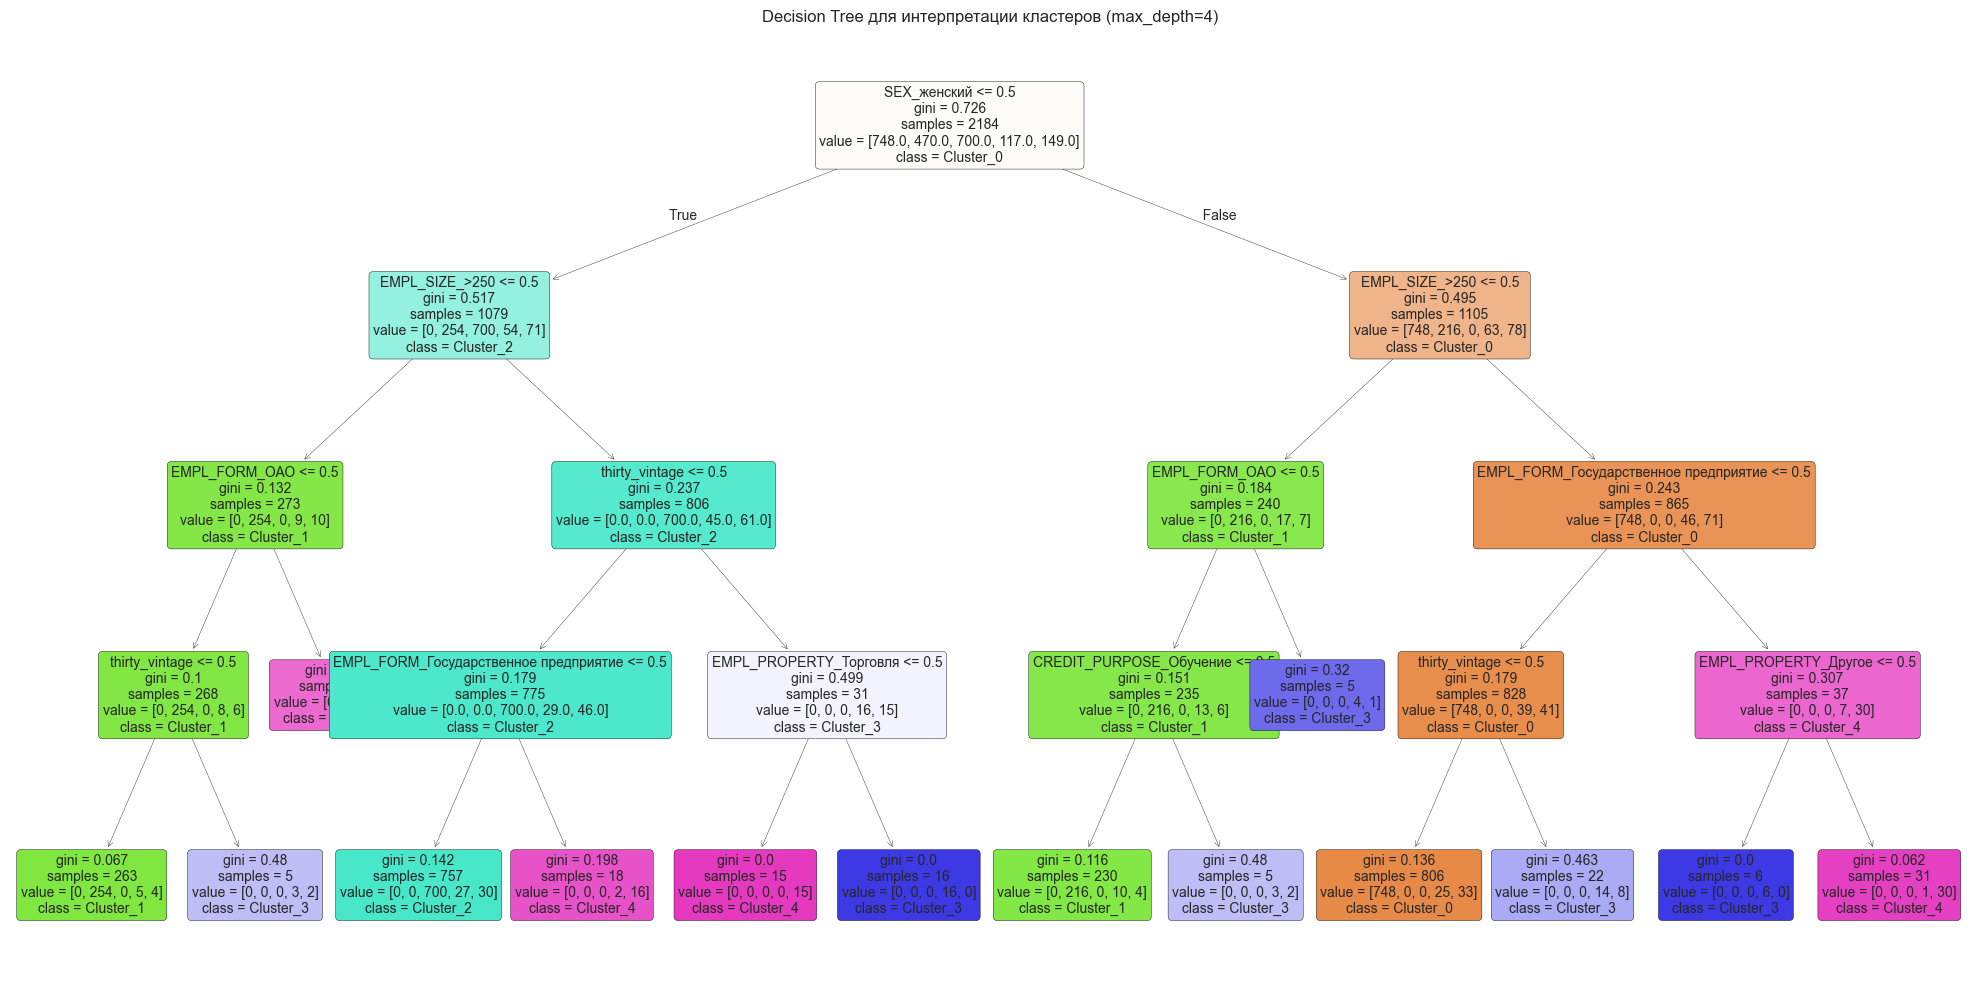

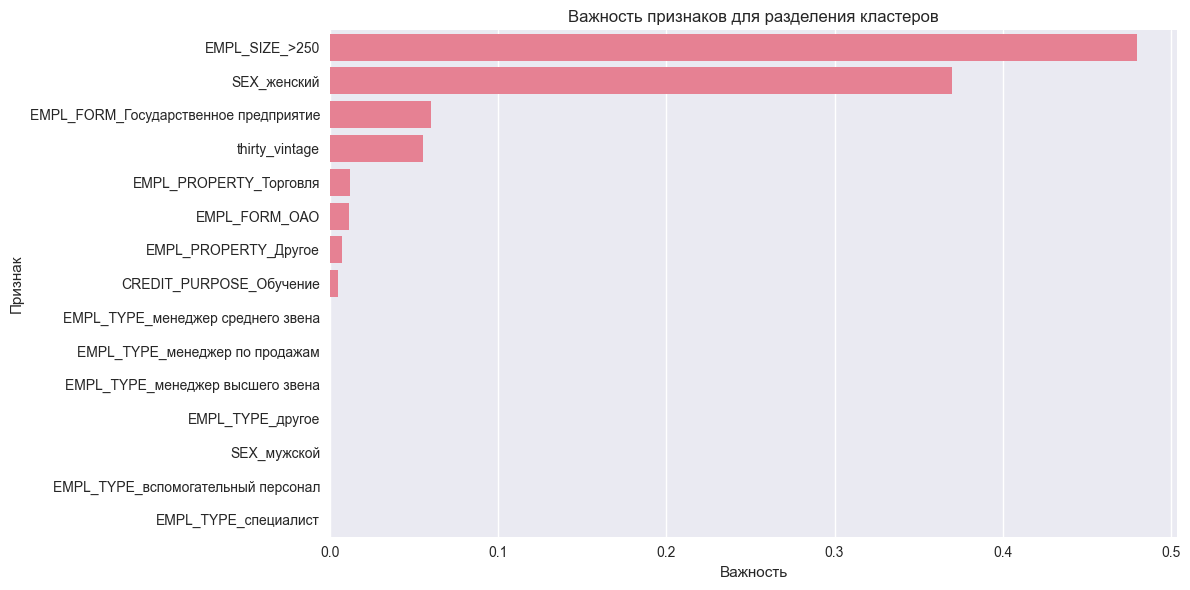

In [507]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


gmm = GaussianMixture(n_components=optimal_n, 
                      random_state=265, 
                      covariance_type='full',
                      n_init=15,
                      max_iter=1000)

cluster_labels = gmm.fit_predict(df_norm)

df_clean['cluster'] = cluster_labels
df_norm_clustered = pd.DataFrame(df_norm)
df_norm_clustered['cluster'] = cluster_labels

print(f"Распределение по кластерам:")
print(df_clean['cluster'].value_counts().sort_index())

X = df_norm.copy()
y = cluster_labels

# разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=256, stratify=y
)

# обучаем дерево решений
dtree = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=5,
    random_state=250
)

dtree.fit(X_train, y_train)

# оценка модели
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

# важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dtree.feature_importances_
}).sort_values('importance', ascending=False)

print("\топ-10 самых важных признаков для разделения кластеров:")
print(feature_importance.head(10))

# визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(dtree, 
          feature_names=X.columns,
          class_names=[f'Cluster_{i}' for i in range(5)],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree для интерпретации кластеров (max_depth=4)")
plt.tight_layout()
plt.show()

# визуализация важности признаков
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Важность признаков для разделения кластеров')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()


Кластер 0: AUC = 0.9796
Кластер 1: AUC = 0.9926
Кластер 2: AUC = 0.9823
Кластер 3: AUC = 0.7123
Кластер 4: AUC = 0.7884


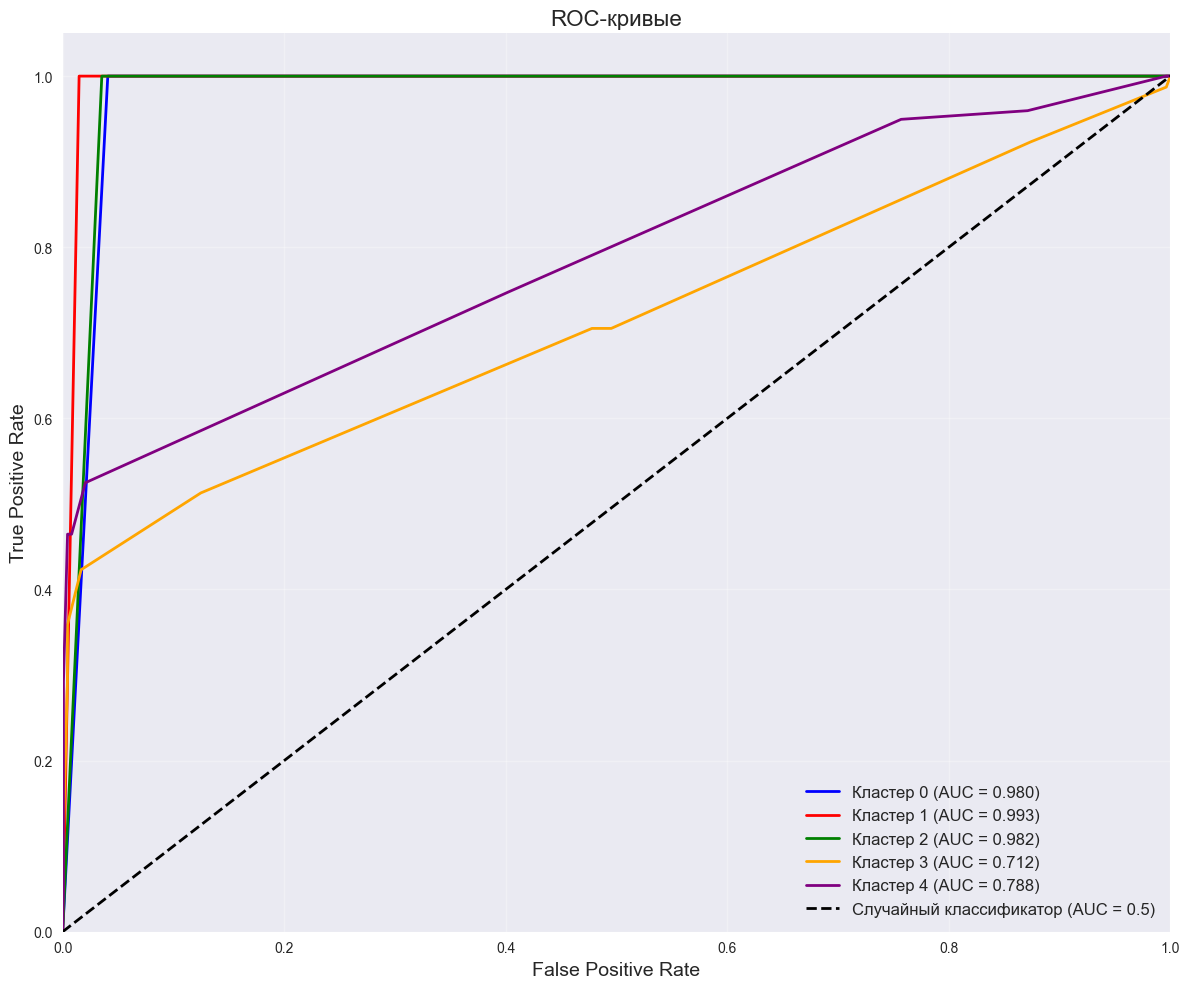

In [509]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_pred_proba = dtree.predict_proba(X_test)
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 10))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 
                'brown', 'pink', 'gray', 'olive', 'cyan'][:n_classes])

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Кластер {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Случайный классификатор (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-кривые', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

for i in range(n_classes):
    print(f"Кластер {i}: AUC = {roc_auc[i]:.4f}")

plt.show()


/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kirilldementev/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid valu

   Кластер 0: 1248 чел. (34.3%)
   Кластер 1: 783 чел. (21.5%)
   Кластер 2: 1167 чел. (32.1%)
   Кластер 3: 195 чел. (5.4%)
   Кластер 4: 248 чел. (6.8%)


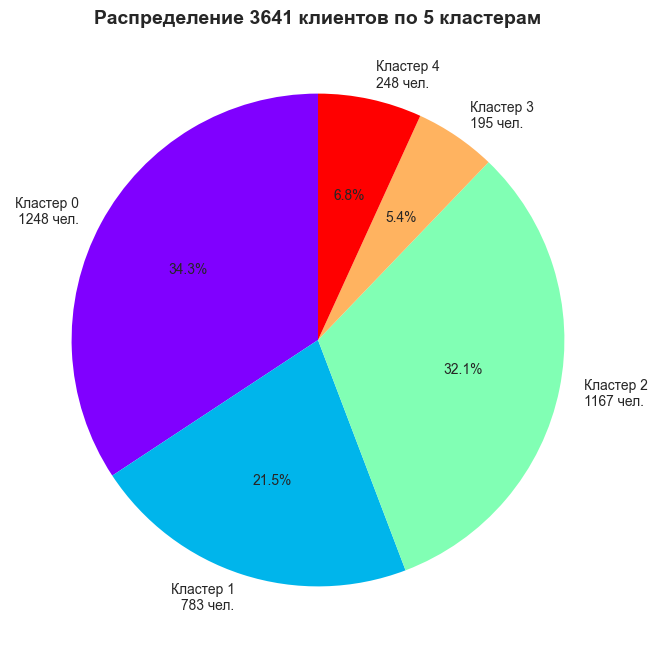

In [ ]:
gmm.fit(df_norm)
labels_gmm = gmm.predict(df_norm)

gmm_counts = np.bincount(labels_gmm)
total_clients = len(labels_gmm)

for i in range(optimal_n):
    count = gmm_counts[i]
    percent = (count / total_clients) * 100
    print(f"   Кластер {i}: {count} чел. ({percent:.1f}%)")

plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, optimal_n))
plt.pie(gmm_counts, 
        labels=[f'Кластер {i}\n{gmm_counts[i]} чел.' for i in range(optimal_n)],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)

plt.title(f'Распределение {total_clients} клиентов по {optimal_n} кластерам', 
          fontsize=14, fontweight='bold')
plt.show()



   Кластер 0: 1345 чел. (36.9%)
   Кластер 1: 823 чел. (22.6%)
   Кластер 2: 1259 чел. (34.6%)
   Кластер 3: 92 чел. (2.5%)
   Кластер 4: 122 чел. (3.4%)


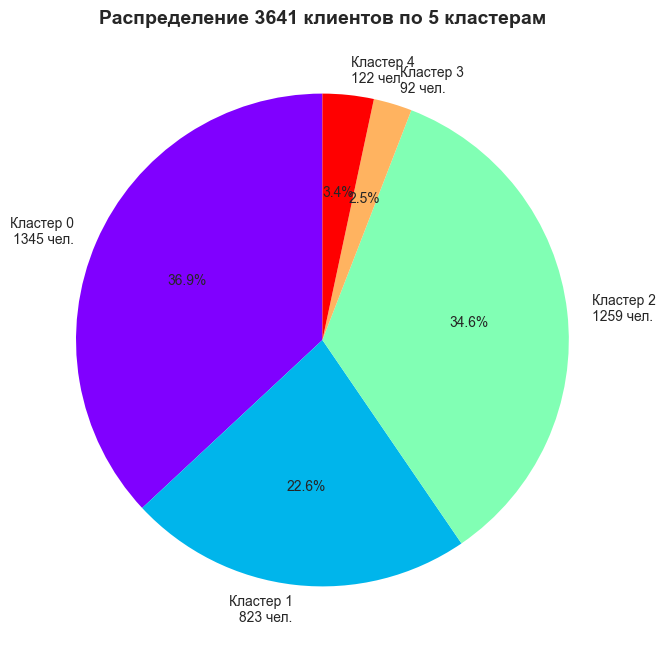

In [513]:

labels_predicted = dtree.predict(df_norm)

y_counts = np.bincount(labels_predicted)
total_clients = len(labels_predicted)

for i in range(optimal_n):
    count = y_counts[i]
    percent = (count / total_clients) * 100
    print(f"   Кластер {i}: {count} чел. ({percent:.1f}%)")

plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, optimal_n))
plt.pie(y_counts, 
        labels=[f'Кластер {i}\n{y_counts[i]} чел.' for i in range(optimal_n)],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)

plt.title(f'Распределение {total_clients} клиентов по {optimal_n} кластерам', 
          fontsize=14, fontweight='bold')
plt.show()

